In [88]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

new_accid = pd.read_csv('./data/new_accid.csv')

new_accid

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,driverlicense,brith
0,2015/2/4 7:20,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006/11/30 0:00,华神牌,366364000000000000,196907
1,2015/2/4 9:20,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004/6/17 0:00,众泰牌,366068000000000000,197512
2,2015/2/4 9:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006/1/23 0:00,大众牌,366577000000000000,197209
3,2015/2/4 8:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012/8/27 0:00,宝来牌,36454651104640395X,199402
4,2015/2/4 11:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004/4/13 0:00,朗逸牌,364556000000000000,197202
...,...,...,...,...,...,...,...,...,...,...,...,...
15329,2015/5/23 18:50,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵GQ5644,白,自培,2005/10/27 0:00,-1,356166000000000000,197311
15330,2015/5/23 18:00,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵JEL255,白,自培,2008/9/23 0:00,-1,56963500000000000,199003
15331,2015/5/24 11:10,保利云山,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AAV529,黑,自培,2002/4/24 0:00,隆鑫牌,364547000000000000,196001
15332,2015/3/16 7:37,水口寺,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AWA986,白色,自培,2001/6/25 0:00,东风标致牌,364547000000000000,195611


##  汽车颜色类型分析

In [3]:
carcolor=new_accid['carcolor']
carcolor.value_counts()

carcolor
白色      5369
白       2442
黑       2172
银       1691
红       1264
蓝        831
黄        643
黑色       390
绿        362
灰色        45
红色        27
黄色        19
灰         16
绿色        15
银色        13
蓝色         8
红          3
银          3
小型         2
北          2
小轿车        2
兰          1
拔丝         1
黑          1
棕          1
 银         1
黑色         1
黄          1
客车         1
兰          1
白色         1
 黑         1
绿          1
猴哥         1
BAI        1
Y银         1
Name: count, dtype: int64

In [4]:
carcolor[carcolor=='Y银']='银'
carcolor.value_counts()

C:\Users\86139\AppData\Local\Temp\ipykernel_22676\2708731900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carcolor[carcolor=='Y银']='银'


carcolor
白色      5369
白       2442
黑       2172
银       1692
红       1264
蓝        831
黄        643
黑色       390
绿        362
灰色        45
红色        27
黄色        19
灰         16
绿色        15
银色        13
蓝色         8
银          3
红          3
小轿车        2
北          2
小型         2
猴哥         1
绿          1
 黑         1
白色         1
兰          1
客车         1
拔丝         1
黄          1
黑色         1
 银         1
BAI        1
棕          1
黑          1
兰          1
Name: count, dtype: int64

In [5]:
carcolor=carcolor.str.strip()  #去掉字符串前后的空格，但是中间不去
carcolor.value_counts()

carcolor
白色     5370
白      2442
黑      2174
银      1696
红      1267
蓝       831
黄       644
黑色      391
绿       363
灰色       45
红色       27
黄色       19
灰        16
绿色       15
银色       13
蓝色        8
小型        2
北         2
兰         2
小轿车       2
BAI       1
猴哥        1
客车        1
拔丝        1
棕         1
Name: count, dtype: int64

In [6]:
carcolor = carcolor.str[0]
carcolor.value_counts()

carcolor
白    7812
黑    2565
银    1709
红    1294
蓝     839
黄     663
绿     378
灰      61
小       4
北       2
兰       2
B       1
猴       1
客       1
拔       1
棕       1
Name: count, dtype: int64

In [50]:
type(carcolor_frep)

pandas.core.series.Series

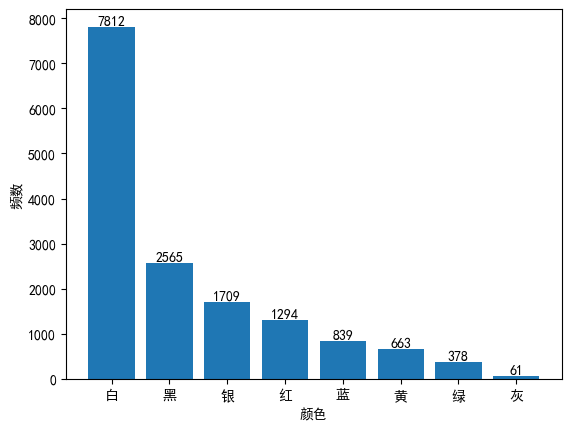

In [7]:
carcolor_frep=carcolor.value_counts()[:8]

plt.bar(carcolor_frep.index,carcolor_frep)
plt.xlabel('颜色')
plt.ylabel('频数')

for index, value in enumerate(carcolor_frep.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

##  汽车品牌分析

In [8]:
clpp=new_accid['clpp']
clpp.value_counts()[:50]

clpp
-1          1633
长安牌          831
五菱牌          546
大众汽车牌        443
丰田牌          397
雪佛兰牌         327
别克牌          323
福克斯牌         314
大众牌          292
北京现代牌        288
解放牌          287
东风标致牌        265
东风雪铁龙牌       239
奥迪牌          226
起亚牌          221
比亚迪牌         215
东风日产牌        209
吉利牌          207
长城牌          201
东风牌          195
捷达牌          195
马自达牌         172
江淮牌          168
瑞麒牌          141
吉利美日牌        140
夏利牌          135
奇瑞牌          135
豪爵牌          134
宝马牌          122
福田牌          117
宝来牌          103
宝马           102
北京牌          102
力帆牌           96
福特牌           95
江铃牌           91
嘉陵牌           87
钱江牌           87
海马牌           87
中华牌           86
万达牌           76
长安            74
思威牌           73
宗申牌           72
朗逸牌           72
荣威牌           70
金杯牌           69
梅赛德斯-奔驰牌      67
雅阁牌           63
英伦牌           63
Name: count, dtype: int64

In [9]:
clpp=clpp.str.replace('牌','')
clpp=clpp.replace('大众汽车','大众')
clpp=clpp.replace('北京','北京现代')
clpp.value_counts()[:50]

clpp
-1         1633
长安          905
大众          750
五菱          583
北京现代        411
丰田          408
别克          340
雪佛兰         339
福克斯         321
解放          302
东风标致        267
奥迪          266
东风雪铁龙       258
起亚          240
宝马          224
比亚迪         216
吉利          209
东风日产        209
长城          208
捷达          208
东风          207
马自达         176
江淮          171
夏利          157
奇瑞          149
瑞麒          141
吉利美日        141
豪爵          139
福田          120
宝来          106
梅赛德斯-奔驰     103
福特          100
力帆           98
嘉陵           97
海马           95
江铃           92
钱江           89
中华           87
宗申           80
万达           78
雅阁           77
金杯           75
思威           73
朗逸           72
荣威           70
一汽佳星         63
英伦           63
锋范           60
隆鑫           60
\N           59
Name: count, dtype: int64

In [10]:
clpp_freq=clpp.value_counts()[1:]
dic=dict(zip(clpp_freq.index,clpp_freq))
dic

{'长安': 905,
 '大众': 750,
 '五菱': 583,
 '北京现代': 411,
 '丰田': 408,
 '别克': 340,
 '雪佛兰': 339,
 '福克斯': 321,
 '解放': 302,
 '东风标致': 267,
 '奥迪': 266,
 '东风雪铁龙': 258,
 '起亚': 240,
 '宝马': 224,
 '比亚迪': 216,
 '吉利': 209,
 '东风日产': 209,
 '长城': 208,
 '捷达': 208,
 '东风': 207,
 '马自达': 176,
 '江淮': 171,
 '夏利': 157,
 '奇瑞': 149,
 '瑞麒': 141,
 '吉利美日': 141,
 '豪爵': 139,
 '福田': 120,
 '宝来': 106,
 '梅赛德斯-奔驰': 103,
 '福特': 100,
 '力帆': 98,
 '嘉陵': 97,
 '海马': 95,
 '江铃': 92,
 '钱江': 89,
 '中华': 87,
 '宗申': 80,
 '万达': 78,
 '雅阁': 77,
 '金杯': 75,
 '思威': 73,
 '朗逸': 72,
 '荣威': 70,
 '一汽佳星': 63,
 '英伦': 63,
 '锋范': 60,
 '隆鑫': 60,
 '\\N': 59,
 '斯柯达': 56,
 '翼虎': 55,
 '蒙迪欧': 55,
 '波罗': 52,
 '沃尔沃': 50,
 '金龙': 50,
 '金旅': 48,
 '雷克萨斯': 47,
 '昌河': 44,
 '飞度': 43,
 '思域': 43,
 '东南': 43,
 '豪泺': 42,
 '宝骏': 42,
 '三菱': 41,
 '红旗': 40,
 '哈飞': 39,
 '帕萨特': 39,
 '无': 38,
 '恒通客车': 38,
 '三铃': 36,
 '陕汽': 36,
 '大运': 34,
 '凯迪拉克': 34,
 '江铃全顺': 33,
 '桑塔纳': 33,
 '众泰': 32,
 '威志': 32,
 '南骏': 30,
 '明锐': 30,
 '传祺': 29,
 '翼搏': 29,
 '华泰圣达菲': 29,
 '轰轰烈': 27,
 '名爵': 26,
 '飞肯':

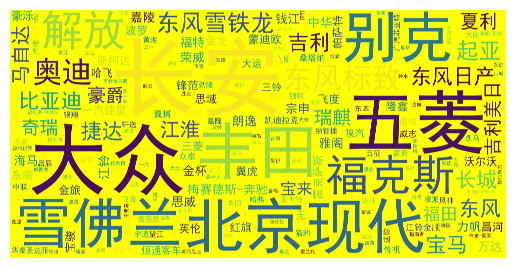

In [11]:
wc = WordCloud(font_path='simhei.ttf',background_color='yellow',scale=30)
wc.fit_words(dic)
plt.imshow(wc)
plt.axis('off')
plt.show()

##  肇事者分析

##  性别

In [12]:
sex=new_accid['sex']
sex_freq=sex.value_counts()
sex_freq

sex
1    14216
0     1118
Name: count, dtype: int64

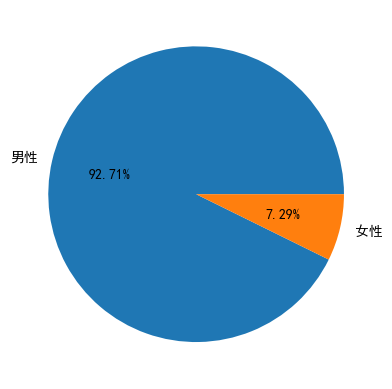

In [13]:
plt.pie(sex_freq,labels=['男性','女性'],autopct='%.2f%%')
plt.show()

##  驾龄

In [14]:
#转换为标准时间格式
new_accid['accidenttime']=pd.to_datetime(new_accid['accidenttime'])
new_accid['cclzrq']=pd.to_datetime(new_accid['cclzrq'])

In [15]:
#计算驾龄
time_diff=new_accid['accidenttime']-new_accid['cclzrq']

In [26]:
time_diff

0       2988 days 07:20:00
1       3884 days 09:20:00
2       3299 days 09:00:00
3        891 days 08:00:00
4       3949 days 11:00:00
               ...        
15329   3495 days 18:50:00
15330   2433 days 18:00:00
15331   4778 days 11:10:00
15332   5012 days 07:37:00
15333    186 days 22:26:00
Length: 15334, dtype: timedelta64[ns]

In [16]:
type(_)

pandas.core.series.Series

In [17]:
time_diff

0       2988 days 07:20:00
1       3884 days 09:20:00
2       3299 days 09:00:00
3        891 days 08:00:00
4       3949 days 11:00:00
               ...        
15329   3495 days 18:50:00
15330   2433 days 18:00:00
15331   4778 days 11:10:00
15332   5012 days 07:37:00
15333    186 days 22:26:00
Length: 15334, dtype: timedelta64[ns]

In [27]:
time_diff.dt.days

0        2988
1        3884
2        3299
3         891
4        3949
         ... 
15329    3495
15330    2433
15331    4778
15332    5012
15333     186
Length: 15334, dtype: int64

In [28]:
year=(time_diff.dt.days)/365
year

0         8.186301
1        10.641096
2         9.038356
3         2.441096
4        10.819178
           ...    
15329     9.575342
15330     6.665753
15331    13.090411
15332    13.731507
15333     0.509589
Length: 15334, dtype: float64

In [19]:
new_accid['drive_year']=year.astype(int)

In [20]:
#驾龄离散化
def cla(n,lim):
    return '[%.f,%.f)'%(lim*(n//lim),lim*(n//lim)+lim)

In [21]:
carage_group=pd.Series([cla(i,3) for i in new_accid['drive_year']])
carage_group_freq=carage_group.value_counts()
carage_group_freq

[0,3)      3948
[3,6)      2855
[6,9)      2545
[9,12)     2513
[12,15)    1321
[15,18)     736
[18,21)     666
[21,24)     393
[24,27)     151
[27,30)     115
[30,33)      34
[33,36)      29
[36,39)      17
[39,42)       7
[48,51)       2
[45,48)       1
[42,45)       1
Name: count, dtype: int64

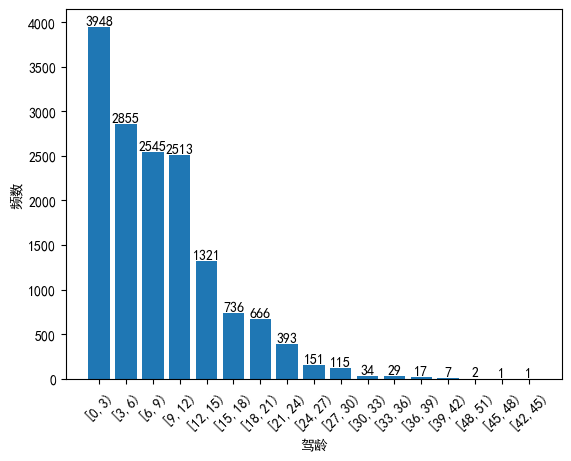

In [22]:
plt.bar(carage_group_freq.index,carage_group_freq)
plt.xticks(rotation=45)
plt.xlabel('驾龄')
plt.ylabel('频数')
for index, value in enumerate(carage_group_freq.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##  年龄

In [23]:
#事故发生时的年份
new_accid['accidenttime_year']=new_accid['accidenttime'].dt.year
#出生年份
new_accid['brith_year']=new_accid['brith'].astype(str).str[:4].astype(int)
#出事故时的年龄
new_accid['age_year']=new_accid['accidenttime_year']-new_accid['brith_year']

In [24]:
age_group=pd.Series([cla(i,5) for i in new_accid['age_year']])
age_group_freq=age_group.value_counts().sort_index()
age_group_freq

[15,20)      34
[20,25)    1056
[25,30)    2737
[30,35)    2679
[35,40)    2434
[40,45)    2624
[45,50)    1737
[50,55)    1212
[55,60)     549
[60,65)     203
[65,70)      55
[70,75)      13
[75,80)       1
Name: count, dtype: int64

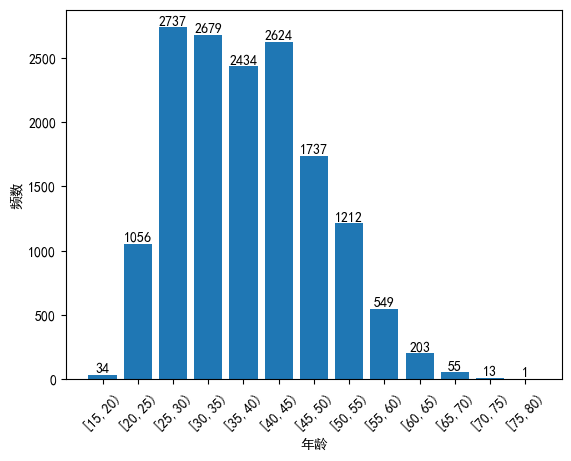

In [25]:
plt.bar(age_group_freq.index,age_group_freq)
plt.xticks(rotation=45)
plt.xlabel('年龄')
plt.ylabel('频数')
for index, value in enumerate(age_group_freq.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##  事故类型分析

In [30]:
new_accid.head()

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,driverlicense,brith,drive_year,accidenttime_year,brith_year,age_year
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,366364000000000000,196907,8,2015,1969,46
1,2015-02-04 09:20:00,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004-06-17,众泰牌,366068000000000000,197512,10,2015,1975,40
2,2015-02-04 09:00:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006-01-23,大众牌,366577000000000000,197209,9,2015,1972,43
3,2015-02-04 08:00:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012-08-27,宝来牌,36454651104640395X,199402,2,2015,1994,21
4,2015-02-04 11:00:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004-04-13,朗逸牌,364556000000000000,197202,10,2015,1972,43


In [32]:
sex_driverfault=new_accid.groupby(by=['sex','driverfault']).size()
sex_driverfault

sex  driverfault              
0    1、追尾的                         281
     2、逆行的                           3
     3、倒车的                          97
     4、停车时未挂低速档、未拉驻车制动，导致车辆滑行的      13
     5、开关车门的                         5
     6、违反交通信号的                       4
     7、未按规定让行的                     460
     8、依法应负全责的其他情形                 151
     9、不符合前8款规定或者双方同时具有上述情形的       104
1    1、追尾的                        4092
     2、逆行的                          57
     3、倒车的                        1240
     4、停车时未挂低速档、未拉驻车制动，导致车辆滑行的     134
     5、开关车门的                        86
     6、违反交通信号的                      36
     7、未按规定让行的                    5526
     8、依法应负全责的其他情形                1848
     9、不符合前8款规定或者双方同时具有上述情形的      1197
dtype: int64

In [35]:
sex_driverfault_freq=sex_driverfault.unstack()
sex_driverfault_freq

driverfault,1、追尾的,2、逆行的,3、倒车的,4、停车时未挂低速档、未拉驻车制动，导致车辆滑行的,5、开关车门的,6、违反交通信号的,7、未按规定让行的,8、依法应负全责的其他情形,9、不符合前8款规定或者双方同时具有上述情形的
sex,,,,,,,,,
0,281,3,97,13,5,4,460,151,104
1,4092,57,1240,134,86,36,5526,1848,1197


In [36]:
type(sex_driverfault_freq)

pandas.core.frame.DataFrame

In [37]:
sex_driverfault_freq.index

Index([0, 1], dtype='int64', name='sex')

In [38]:
sex_driverfault_freq.columns

Index(['1、追尾的', '2、逆行的', '3、倒车的', '4、停车时未挂低速档、未拉驻车制动，导致车辆滑行的', '5、开关车门的',
       '6、违反交通信号的', '7、未按规定让行的 ', '8、依法应负全责的其他情形', '9、不符合前8款规定或者双方同时具有上述情形的'],
      dtype='object', name='driverfault')

In [48]:
sex_driverfault_freq.index=(['女','男'])
sex_driverfault_freq.columns=(['1','2','3','4','5','6','7','8','9'])

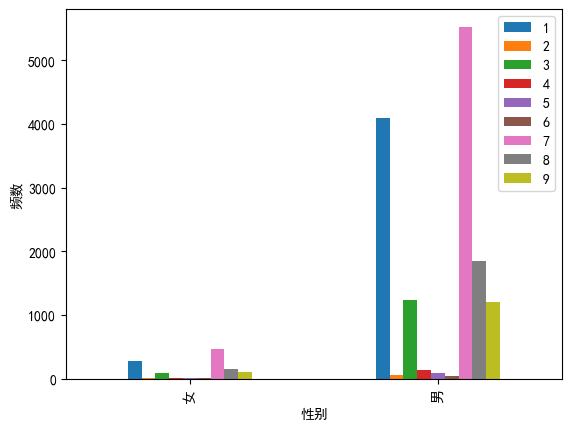

In [49]:
sex_driverfault_freq.plot(kind='bar')
plt.xlabel('性别')
plt.ylabel('频数')
plt.show()

##  事故发生的时间点分析

In [52]:
new_accid['accident_month']=new_accid['accidenttime'].dt.month

In [59]:
new_accid['accident_hour']=new_accid['accidenttime'].dt.hour

In [60]:
month_hour_freq=new_accid.groupby(by=['accident_month','accident_hour']).size()
month_hour_freq

accident_month  accident_hour
1               0                  1
                4                  1
                8                  2
                9                  1
                10                 2
                                ... 
5               19               106
                20               128
                21               124
                22                80
                23                25
Length: 108, dtype: int64

In [71]:
month_hour_freq.unstack()

accident_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
accident_month,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,...,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN
2,36.0,10.0,8.0,13.0,5.0,8.0,5.0,41.0,139.0,137.0,...,164.0,168.0,125.0,149.0,113.0,64.0,79.0,81.0,33.0,13.0
3,55.0,13.0,15.0,14.0,16.0,20.0,37.0,176.0,408.0,363.0,...,310.0,346.0,311.0,376.0,281.0,130.0,164.0,144.0,86.0,30.0
4,93.0,8.0,17.0,28.0,21.0,33.0,45.0,208.0,498.0,431.0,...,297.0,309.0,285.0,350.0,271.0,119.0,128.0,144.0,87.0,29.0
5,97.0,20.0,19.0,23.0,29.0,24.0,39.0,212.0,398.0,331.0,...,302.0,272.0,275.0,331.0,245.0,106.0,128.0,124.0,80.0,25.0


In [72]:
month_hour_freq=month_hour_freq.unstack().T

In [73]:
month_hour_freq[1]

accident_hour
0     1.0
1     NaN
2     NaN
3     NaN
4     1.0
5     NaN
6     NaN
7     NaN
8     2.0
9     1.0
10    2.0
11    1.0
12    2.0
13    NaN
14    3.0
15    1.0
16    4.0
17    2.0
18    NaN
19    1.0
20    NaN
21    NaN
22    NaN
23    NaN
Name: 1, dtype: float64

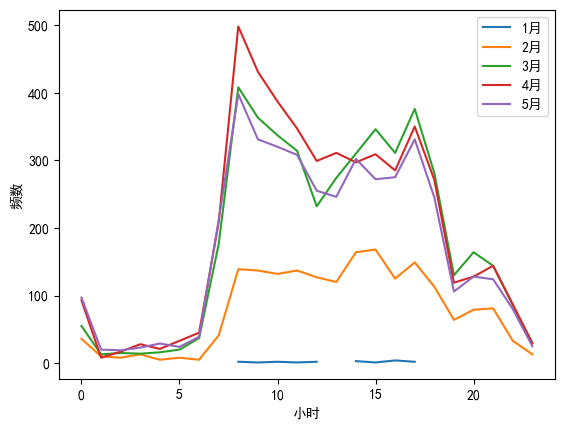

In [74]:
fig, ax = plt.subplots()

ax.plot(month_hour_freq[1], label='1') 
ax.plot(month_hour_freq[2], label='2')  
ax.plot(month_hour_freq[3], label='3') 
ax.plot(month_hour_freq[4], label='4')  
ax.plot(month_hour_freq[5], label='5') 


ax.legend(["1月","2月","3月","4月","5月"])
plt.xlabel('小时')
plt.ylabel('频数')

plt.show()

[Text(0.5, 0, '时间'), Text(0.5, 1.0, '事故发生的时间点分析')]

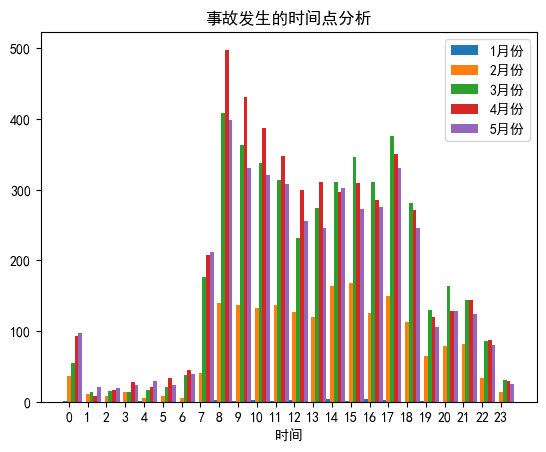

In [78]:
fig, ax = plt.subplots()

index=np.arange(len(month_hour_freq))

bar_width=0.2

plt.bar(index,month_hour_freq[1],bar_width,label='1月份')
plt.bar(index+bar_width*1,month_hour_freq[2],bar_width,label='2月份')
plt.bar(index+bar_width*2,month_hour_freq[3],bar_width,label='3月份')
plt.bar(index+bar_width*3,month_hour_freq[4],bar_width,label='4月份')
plt.bar(index+bar_width*4,month_hour_freq[5],bar_width,label='5月份')

plt.xticks(index+bar_width,month_hour_freq.index)

plt.legend()

ax.set(xlabel='时间',
       title='事故发生的时间点分析')

##  驾校词云图分析

In [85]:
jiaxiao=new_accid['jxmc']
jiaxiao_freq=jiaxiao.value_counts()
jiaxiao_freq

jxmc
自培                     5471
十一培                    1831
铁二局驾校                   375
消防驾校                    336
吉源驾校                    257
                       ... 
M027                      1
永康市保安服务公司机动车驾驶员培训学校       1
黔南州兴鑫驾驶员培训学校              1
遵义县南白驾校                   1
贵阳诚信东山分校                  1
Name: count, Length: 363, dtype: int64

In [86]:
#转化为字典格式
jiaxiao_dic=dict(zip(jiaxiao_freq.index,jiaxiao_freq))
jiaxiao_dic

{'自培': 5471,
 '十一培': 1831,
 '铁二局驾校': 375,
 '消防驾校': 336,
 '吉源驾校': 257,
 '全林驾校': 246,
 '顺一驾驶培训学校': 221,
 '新天驾校': 205,
 '鑫鑫驾校': 201,
 '（经开区）十一驾驶培训有限公司': 185,
 '贵州现代驾驶培训责任有限公司': 178,
 '长运驾校': 171,
 '（乌当区）新天驾驶培训有限公司': 168,
 '（南明区）吉源驾驶培训有限公司': 164,
 '诚信驾驶培训学校': 162,
 '贵州省长安驾驶培训学校': 159,
 '（南明区）铁二局驾驶培训有限公司': 157,
 '文通驾校': 156,
 '（南明区）阳光驾驶培训有限公司': 150,
 '路路达驾校': 149,
 '（南明区）金大驾驶培训有限公司': 139,
 '（乌当区）全林驾驶培训有限公司': 136,
 '（观山湖区）蓝天驾驶培训有限公司': 130,
 '十一驾驶培训有限公司': 128,
 '蓝天驾校': 127,
 '新华驾校': 125,
 '（白云区）消防驾驶培训学校': 117,
 '市交校': 102,
 '省交校': 100,
 '时发驾校': 99,
 '景宏驾校': 91,
 '（云岩区）省交通职业技术驾驶培训学校': 90,
 '（乌当区）新华驾驶培训有限公司': 82,
 '高新驾校': 79,
 '贵大驾校': 79,
 '金大驾校': 74,
 '青正驾校': 68,
 '（白云区）景宏驾驶培训有限公司': 68,
 '贵大佳德驾驶培训学校': 68,
 '（南明区）市交通职业技术驾驶培训学校': 64,
 '（观山湖区）诚信驾驶培训有限公司': 63,
 '阳光驾校': 62,
 '（南明区）现代驾驶培训有限公司': 62,
 '凯信驾校': 60,
 '无': 59,
 '贵州平安驾驶培训学校': 57,
 '（乌当区）平安驾驶培训有限公司': 56,
 '（花溪区）高新十七驾驶培训有限公司': 50,
 '（南明区）长运驾驶培训有限公司': 50,
 '市警校驾校': 50,
 '黔丰驾校': 48,
 '（经开区）顺一驾驶培训有限公司': 44,
 '（花溪区）金马驾驶培训有限公司': 44,
 '（南明区）长安驾驶培训

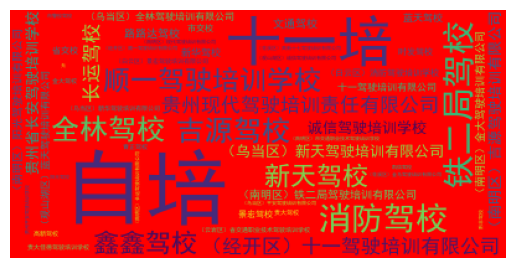

In [97]:
wc=WordCloud(font_path='simhei.ttf',background_color='red')
wc.fit_words(jiaxiao_dic)
plt.imshow(wc)
plt.axis('off')
plt.show()

##  天气分析

In [105]:
data = {
    '日期':['2024-06-01','2024-06-02','2024-06-03','2024-06-04','2024-06-05'],
    '天气状况':['小雨转中雨','暴雨','雪','阴','小雨/阴']
}

weather1=pd.DataFrame(data)
print(weather1)


           日期   天气状况
0  2024-06-01  小雨转中雨
1  2024-06-02     暴雨
2  2024-06-03      雪
3  2024-06-04      阴
4  2024-06-05   小雨/阴


In [109]:
weather1['处理后天气状况']=[0,0,0,0,0]

In [110]:
list1 = ['小雨','中雨']
list2 = ['大雨','暴雨','阵雨']
list3 = ['冻雨','雪']
for i in range(len(weather1['天气状况'])):
    if any(key in weather1.loc[i,'天气状况'] for key in list1):
        weather1.loc[i,'处理后天气状况'] = '小到中雨'
    elif any(key in weather1.loc[i,'天气状况'] for key in list2):
        weather1.loc[i,'处理后天气状况'] = '大雨及以上'
    elif any(key in weather1.loc[i,'天气状况'] for key in list3):
        weather1.loc[i,'处理后天气状况'] = '小雪'
    else:
        weather1.loc[i,'处理后天气状况'] = '晴'

weather1

,日期,天气状况,处理后天气状况
0,2024-06-01,小雨转中雨,小到中雨
1,2024-06-02,暴雨,大雨及以上
2,2024-06-03,雪,小雪
3,2024-06-04,阴,晴
4,2024-06-05,小雨/阴,小到中雨


In [98]:
weather=pd.read_csv('./data/guiyang2015tianqishuju.csv',encoding='gbk')
weather.head()

,日期,天气状况,气温,风力风向
0,2015年1月1日,阴 /阴,8℃ / 6℃,东北风 ≤3级 /南风 ≤3级
1,2015年1月2日,多云 /多云,12℃ / 6℃,南风 ≤3级 /南风 ≤3级
2,2015年1月3日,多云 /多云,13℃ / 7℃,南风 ≤3级 /南风 ≤3级
3,2015年1月4日,多云 /阴,13℃ / 7℃,东北风 ≤3级 /东南风 ≤3级
4,2015年1月5日,小雨 /小雨,11℃ / 3℃,东南风 ≤3级 /东北风 ≤3级


In [100]:
weather['日期']=pd.to_datetime(weather['日期'],format='%Y年%m月%d日')
weather.head()

,日期,天气状况,气温,风力风向
0,2015-01-01,阴 /阴,8℃ / 6℃,东北风 ≤3级 /南风 ≤3级
1,2015-01-02,多云 /多云,12℃ / 6℃,南风 ≤3级 /南风 ≤3级
2,2015-01-03,多云 /多云,13℃ / 7℃,南风 ≤3级 /南风 ≤3级
3,2015-01-04,多云 /阴,13℃ / 7℃,东北风 ≤3级 /东南风 ≤3级
4,2015-01-05,小雨 /小雨,11℃ / 3℃,东南风 ≤3级 /东北风 ≤3级


In [101]:
weather['天气状况'].value_counts()

天气状况
多云 /多云     69
阵雨 /阵雨     57
阴 /阴       25
小雨 /小雨     24
阴 /阵雨      21
阴 /小雨      19
多云 /阵雨     17
多云 /阴      14
阵雨 /阴      11
阵雨 /雷阵雨     9
阵雨 /多云      9
晴 /多云       7
多云 /雷阵雨     6
中雨 /阵雨      5
多云 /小雨      5
阴 /多云       5
小雨 /阵雨      4
阵雨 /大雨      4
多云 /晴       3
阴 /雷阵雨      3
阵雨 /小雨      3
晴 /晴        3
小雨 /阴       2
冻雨 /冻雨      2
阵雨 /中雨      2
多云 /大雨      2
雷阵雨 /阵雨     1
雨夹雪 /小雪     1
中雨 /小雨      1
大雨 /阵雨      1
阴 /晴        1
阴 /暴雨       1
雷阵雨 /中雨     1
多云 /中雨      1
中雨 /中雨      1
雨夹雪 /冻雨     1
小雨 /多云      1
Name: count, dtype: int64

In [111]:
list1 = ['小雨','中雨']
list2 = ['大雨','暴雨','阵雨']
list3 = ['冻雨','雪']
for i in range(len(weather['天气状况'])):
    if any(key in weather.loc[i,'天气状况'] for key in list1):
        weather.loc[i,'天气状况'] = '小到中雨'
    elif any(key in weather.loc[i,'天气状况'] for key in list2):
        weather.loc[i,'天气状况'] = '大雨及以上'
    elif any(key in weather.loc[i,'天气状况'] for key in list3):
        weather.loc[i,'天气状况'] = '小雪'
    else:
        weather.loc[i,'天气状况'] = '晴'

weather

,日期,天气状况,气温,风力风向
0,2015-01-01,晴,8℃ / 6℃,东北风 ≤3级 /南风 ≤3级
1,2015-01-02,晴,12℃ / 6℃,南风 ≤3级 /南风 ≤3级
2,2015-01-03,晴,13℃ / 7℃,南风 ≤3级 /南风 ≤3级
3,2015-01-04,晴,13℃ / 7℃,东北风 ≤3级 /东南风 ≤3级
4,2015-01-05,小到中雨,11℃ / 3℃,东南风 ≤3级 /东北风 ≤3级
...,...,...,...,...
337,2015-12-04,小到中雨,5℃ / 3℃,东北风 ≤3级 /东北风 ≤3级
338,2015-12-05,小到中雨,8℃ / 3℃,东北风 ≤3级 /东北风 ≤3级
339,2015-12-06,晴,11℃ / 2℃,东北风 ≤3级 /东北风 ≤3级
340,2015-12-07,晴,13℃ / 3℃,东北风 ≤3级 /东北风 ≤3级


In [112]:
weather_freq=weather['天气状况'].value_counts()
weather_freq

天气状况
大雨及以上    142
晴        127
小到中雨      69
小雪         4
Name: count, dtype: int64

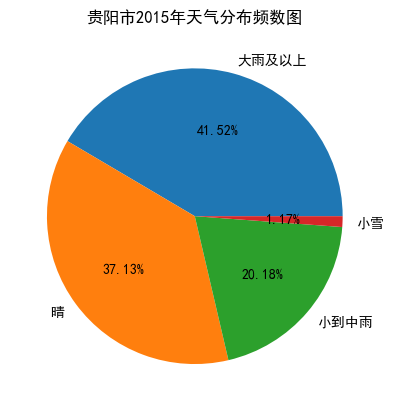

In [113]:
plt.pie(weather_freq,labels=weather_freq.index,autopct='%.2f%%')
plt.title('贵阳市2015年天气分布频数图')
plt.show()

##  事故发生天气状况分析

In [116]:
new_accid['date']=new_accid['accidenttime'].dt.date#只显示日期
new_accid.head()

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,driverlicense,brith,drive_year,accidenttime_year,brith_year,age_year,accident_month,accident_hour,date
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,366364000000000000,196907,8,2015,1969,46,2,7,2015-02-04
1,2015-02-04 09:20:00,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004-06-17,众泰牌,366068000000000000,197512,10,2015,1975,40,2,9,2015-02-04
2,2015-02-04 09:00:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006-01-23,大众牌,366577000000000000,197209,9,2015,1972,43,2,9,2015-02-04
3,2015-02-04 08:00:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012-08-27,宝来牌,36454651104640395X,199402,2,2015,1994,21,2,8,2015-02-04
4,2015-02-04 11:00:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004-04-13,朗逸牌,364556000000000000,197202,10,2015,1972,43,2,11,2015-02-04


In [118]:
new_accid['date']=pd.to_datetime(new_accid['date'])
new_accid.head()

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,driverlicense,brith,drive_year,accidenttime_year,brith_year,age_year,accident_month,accident_hour,date
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,366364000000000000,196907,8,2015,1969,46,2,7,2015-02-04
1,2015-02-04 09:20:00,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004-06-17,众泰牌,366068000000000000,197512,10,2015,1975,40,2,9,2015-02-04
2,2015-02-04 09:00:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006-01-23,大众牌,366577000000000000,197209,9,2015,1972,43,2,9,2015-02-04
3,2015-02-04 08:00:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012-08-27,宝来牌,36454651104640395X,199402,2,2015,1994,21,2,8,2015-02-04
4,2015-02-04 11:00:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004-04-13,朗逸牌,364556000000000000,197202,10,2015,1972,43,2,11,2015-02-04


In [120]:
#合并天气和事故表
new_data=pd.merge(new_accid,weather,left_on='date',right_on='日期',how='inner')
new_data

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,...,accidenttime_year,brith_year,age_year,accident_month,accident_hour,date,日期,天气状况,气温,风力风向
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,...,2015,1969,46,2,7,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
1,2015-02-04 09:20:00,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004-06-17,众泰牌,...,2015,1975,40,2,9,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
2,2015-02-04 09:00:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006-01-23,大众牌,...,2015,1972,43,2,9,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
3,2015-02-04 08:00:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012-08-27,宝来牌,...,2015,1994,21,2,8,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
4,2015-02-04 11:00:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004-04-13,朗逸牌,...,2015,1972,43,2,11,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,2015-01-30 16:00:00,宝山南路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵A6E188,银,十一培,1999-04-05,-1,...,2015,1979,36,1,16,2015-01-30,2015-01-30,小雪,1℃ / -3℃,东北风 ≤3级 /东北风 ≤3级
15330,2015-01-30 16:10:00,宝山北路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵ALP909,银,十一培,1995-02-01,五菱牌,...,2015,1968,47,1,16,2015-01-30,2015-01-30,小雪,1℃ / -3℃,东北风 ≤3级 /东北风 ≤3级
15331,2015-01-30 16:00:00,宝山南路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵ALP909,银,十一培,1995-02-01,五菱牌,...,2015,1968,47,1,16,2015-01-30,2015-01-30,小雪,1℃ / -3℃,东北风 ≤3级 /东北风 ≤3级
15332,2015-01-30 16:10:00,宝山北路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵A6E188,银,十一培,1999-04-05,-1,...,2015,1979,36,1,16,2015-01-30,2015-01-30,小雪,1℃ / -3℃,东北风 ≤3级 /东北风 ≤3级


In [125]:
new_data1=pd.merge(new_accid,weather,left_on='date',right_on='日期',how='left')
new_data1

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,...,accidenttime_year,brith_year,age_year,accident_month,accident_hour,date,日期,天气状况,气温,风力风向
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,...,2015,1969,46,2,7,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
1,2015-02-04 09:20:00,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004-06-17,众泰牌,...,2015,1975,40,2,9,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
2,2015-02-04 09:00:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006-01-23,大众牌,...,2015,1972,43,2,9,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
3,2015-02-04 08:00:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012-08-27,宝来牌,...,2015,1994,21,2,8,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
4,2015-02-04 11:00:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004-04-13,朗逸牌,...,2015,1972,43,2,11,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,2015-05-23 18:50:00,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵GQ5644,白,自培,2005-10-27,-1,...,2015,1973,42,5,18,2015-05-23,2015-05-23,大雨及以上,19℃ / 14℃,东北风 ≤3级 /东北风 ≤3级
15330,2015-05-23 18:00:00,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵JEL255,白,自培,2008-09-23,-1,...,2015,1990,25,5,18,2015-05-23,2015-05-23,大雨及以上,19℃ / 14℃,东北风 ≤3级 /东北风 ≤3级
15331,2015-05-24 11:10:00,保利云山,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AAV529,黑,自培,2002-04-24,隆鑫牌,...,2015,1960,55,5,11,2015-05-24,2015-05-24,晴,24℃ / 18℃,东风 ≤3级 /东南风 ≤3级
15332,2015-03-16 07:37:00,水口寺,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AWA986,白色,自培,2001-06-25,东风标致牌,...,2015,1956,59,3,7,2015-03-16,2015-03-16,晴,20℃ / 15℃,南风 ≤3级 /南风 ≤3级


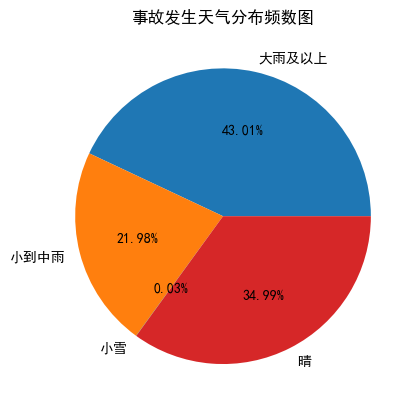

In [124]:
groups=new_data.groupby(by='天气状况').size()
plt.pie(groups,labels=groups.index,autopct='%.2f%%')
plt.title('事故发生天气分布频数图')
plt.show()

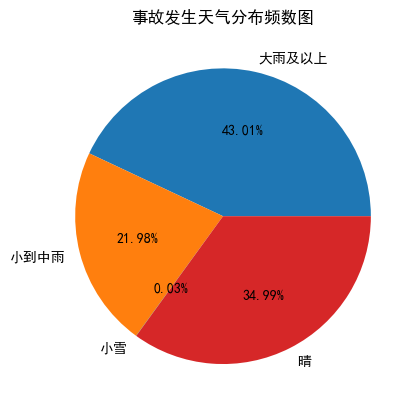

In [126]:
groups=new_data1.groupby(by='天气状况').size()
plt.pie(groups,labels=groups.index,autopct='%.2f%%')
plt.title('事故发生天气分布频数图')
plt.show()

##  肇事者违法数量分析

In [129]:
wf = pd.read_csv('./data/wf1.csv',encoding = 'gbk')
wf.head()

,jsz8,wfbh,wfsj,wfxw,wfjf,wfnr
0,366876000000000000,5201110000000000000000,2015/11/5 10:23,60230,0,驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的
1,36606851984051445X,5201110000000000000000,2015/10/23 13:48,60230,0,驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的
2,364556000000000000,5201110000000000000000,2015/10/27 16:09,60230,0,驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的
3,364556000000000000,5201110000000000000000,2015/10/27 16:15,60230,0,驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的
4,364557000000000000,5201110000000000000000,2015/11/16 13:22,60230,0,驾驶机动车在高速公路、城市快速路以外的道路上不按规定车道行驶的


In [130]:
jsz8_freq=wf.groupby('jsz8').size()
jsz8_freq

jsz8
00416751935552073X     5
00466551234269085X     1
00496651215440333X     1
03416651905540737X     2
03416651914658755X     3
                      ..
786369000000000000     5
786746000000000000     1
786766000000000000     4
786770000000000000     1
786976000000000000     1
Length: 4539, dtype: int64

In [131]:
type(jsz8_freq)

pandas.core.series.Series

In [132]:
wf_license=pd.DataFrame({'driverlicense':jsz8_freq.index,'freq':jsz8_freq})   #将series转换成df
wf_license.reset_index(drop=True,inplace=True)
wf_license

,driverlicense,freq
0,00416751935552073X,5
1,00466551234269085X,1
2,00496651215440333X,1
3,03416651905540737X,2
4,03416651914658755X,3
...,...,...
4534,786369000000000000,5
4535,786746000000000000,1
4536,786766000000000000,4
4537,786770000000000000,1


In [133]:
data=pd.merge(new_data,wf_license,on='driverlicense',how='inner')
data

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,...,brith_year,age_year,accident_month,accident_hour,date,日期,天气状况,气温,风力风向,freq
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30,华神牌,...,1969,46,2,7,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级,625
1,2015-02-02 19:30:00,小河清水江路,7、未按规定让行的,负全部责任,1,贵AHG599,白色,（南明区）阳光驾驶培训有限公司,2005-02-07,别克牌,...,1973,42,2,19,2015-02-02,2015-02-02,小到中雨,7℃ / 3℃,南风 ≤3级 /东南风 ≤3级,625
2,2015-02-03 12:30:00,机场路,8、依法应负全责的其他情形,负全部责任,1,贵AA454L,白色,新天驾校,2014-02-11,东风雪铁龙牌,...,1964,51,2,12,2015-02-03,2015-02-03,小到中雨,6℃ / 1℃,东北风 ≤3级 /东北风 ≤3级,625
3,2015-02-06 09:30:00,西二环,7、未按规定让行的,负全部责任,1,贵AKK214,黑,自培,2004-12-30,佳乐,...,1971,44,2,9,2015-02-06,2015-02-06,小到中雨,9℃ / 2℃,南风 ≤3级 /南风 ≤3级,625
4,2015-02-07 11:00:00,孟关,3、倒车的,负全部责任,1,贵AN1836,黑,-1,1977-11-14,豪爵牌,...,1956,59,2,11,2015-02-07,2015-02-07,晴,8℃ / 3℃,东北风 ≤3级 /东北风 ≤3级,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14280,2015-05-22 18:00:00,花溪大道,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AB743V,白色,铁二局驾校,2014-12-02,-1,...,1989,26,5,18,2015-05-22,2015-05-22,大雨及以上,19℃ / 14℃,东风 ≤3级 /东风 ≤3级,1
14281,2015-05-06 10:30:00,长江路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AKF824,白色,十一培,1996-06-05,东风日产牌,...,1950,65,5,10,2015-05-06,2015-05-06,晴,25℃ / 16℃,东北风 ≤3级 /南风 ≤3级,1
14282,2015-05-29 18:00:00,云峰大道,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,0,贵AM5038,蓝,自培,2003-11-21,劲扬牌,...,1971,44,5,18,2015-05-29,2015-05-29,大雨及以上,24℃ / 17℃,东南风 ≤3级 /东北风 ≤3级,4
14283,2015-04-07 07:50:00,北京西路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AS1279,蓝,自培,2007-08-28,亚洲英雄牌,...,1979,36,4,7,2015-04-07,2015-04-07,小到中雨,9℃ / 5℃,东北风 ≤3级 /东北风 ≤3级,1


In [134]:
data.to_csv('./data/data.csv',index=False)